<a href="https://colab.research.google.com/github/rushikeshnakhate/PortfoliOpt/blob/master/expected_return_df_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from pathlib import Path
import os
output_dir = Path("/content")
import matplotlib.pyplot as plt
# !pip install tqdm
# !pip install PyPortfolioOpt
# !pip install tabulate
import scipy.optimize as sci_opt
from tqdm import tqdm  # Import the tqdm progress b

ERROR: Could not find a version that satisfies the requirement data-table (from versions: none)
ERROR: No matching distribution found for data-table


In [ ]:
result_pkl_filepath = os.path.join(output_dir, "results.pkl")
allocation_pkl_filepath = os.path.join(output_dir, "allocation.pkl")
performance_pkl_filepath = os.path.join(output_dir, "performance.pkl")
data_pkl_filepath = os.path.join(output_dir, "data.pkl")
expected_return_pkl_filepath = os.path.join(output_dir, "expected_return.pkl")

In [ ]:
start_date = '2024-01-01'
end_date = '2024-01-30'
previous_end_date = '2024-01-29'
data = pd.read_pickle(data_pkl_filepath)
expected_return_df = pd.read_pickle(expected_return_pkl_filepath)
optimized_df = pd.read_pickle(result_pkl_filepath)
allocation_df = pd.read_pickle(allocation_pkl_filepath)
performance_df = pd.read_pickle(performance_pkl_filepath)


In [ ]:
# from google.colab import data_table
# data_table.DataTable(expected_return_df.head())

# # Assuming df is your DataFrame
# def clean_metadata(value):
#     if isinstance(value, pd.Series):
#         return value.values  # Extract just the values
#     elif isinstance(value, list):
#         return [str(v) for v in value]  # Convert each element to string for clarity
#     return value

# def extract_value(value):
#     # Check if the value is a list and has only one element, then extract it
#     # print(type(value))
#     if isinstance(value, (np.ndarray, list)) and len(value) == 1:
#         return value[0]
#     # elif isinstance(value, tuple) and len(value) >= 2:
#     #   return value[1]
#     return value  # Return the value as-is if not a list

# # Apply this function to every cell in the DataFrame
# df1 = allocation_df.applymap(clean_metadata)
# df = df1.applymap(extract_value)

In [ ]:
# data_table.DataTable(optimized_df.head(2))

In [ ]:
# data_table.DataTable(allocation_df.head())

In [ ]:
# data_table.DataTable(performance_df.head(2))

In [ ]:
# data_table.DataTable(expected_return_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_expected_return_df(df):
  # Assuming your DataFrame is named 'df' and 'Ticker' is already set as the index
  # If 'Ticker' is not set as the index, you can uncomment the line below to set it
  # df.set_index('Ticker', inplace=True)

  # Create a grouped bar plot for the columns listed
  ax = df.plot(kind='bar', figsize=(15, 8), width=0.8)

  # Set labels and title
  ax.set_xlabel('Ticker')
  ax.set_ylabel('Values')
  ax.set_title('Comparison of Different Methods Across Tickers')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45, ha='right')

  # Add a legend with a title
  plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Show grid for better readability
  plt.grid(True, linestyle='--', alpha=0.6)

  # Adjust layout to prevent clipping of tick-labels
  plt.tight_layout()

  # Show the plot
  plt.show()


def plot_expected_return_df_heatmap(df):
  # Check the DataFrame
  df['Ticker'] = df.index.tolist()

  # Set figure size
  plt.figure(figsize=(10, 8))

  # Create a heatmap using the original DataFrame without melting
  sns.heatmap(df.set_index('Ticker'), annot=True, cmap='coolwarm', linewidths=0.5)

  # Set labels and title
  plt.title('Heatmap of Different Methods Across Tickers', fontsize=16)
  plt.xlabel('Methods', fontsize=12)
  plt.ylabel('Tickers', fontsize=12)

  # Show plot
  plt.tight_layout()
  plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_expected_return_df_heatmap_log(df):
  # Sample DataFrame - Replace this with your actual DataFrame
  # Assuming df is already set with Ticker as the index
  # Example: df = pd.read_csv('your_data.csv')

  # Enhanced Bar Plot with Logarithmic Scale
  plt.figure(figsize=(15, 8))
  ax = df.plot(kind='bar', logy=True, figsize=(15, 8), width=0.8)  # Set logy=True for logarithmic scale
  ax.set_xlabel('Ticker')
  ax.set_ylabel('Values (Log Scale)')
  ax.set_title('Comparison of Different Methods Across Tickers')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.tight_layout()
  plt.show()



plot_expected_return_df(expected_return_df)
plot_expected_return_df_heatmap(expected_return_df)
plot_expected_return_df_heatmap_log(expected_return_df)

In [ ]:
df = expected_return_df
# Box Plot to visualize the spread and identify outliers for each method
plt.figure(figsize=(14, 7))
sns.boxplot(data=df)
plt.title('Box Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [ ]:


# Violin Plot to see the distribution of values for each method
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, inner="quartile", palette="Set3")
plt.title('Violin Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Swarm Plot to visualize individual values grouped by method
plt.figure(figsize=(14, 7))
sns.swarmplot(data=df, palette="Set2", size=5)
plt.title('Swarm Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 97.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [ ]:
# Strip Plot to show data points distribution for each method
plt.figure(figsize=(14, 7))
sns.stripplot(data=df, jitter=True, palette="husl")
plt.title('Strip Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Pair Plot to explore relationships between different methods
sns.pairplot(df, diag_kind='kde', palette="viridis")
plt.suptitle('Pair Plot of Methods Across Tickers', y=1.02)
plt.tight_layout()
plt.show()


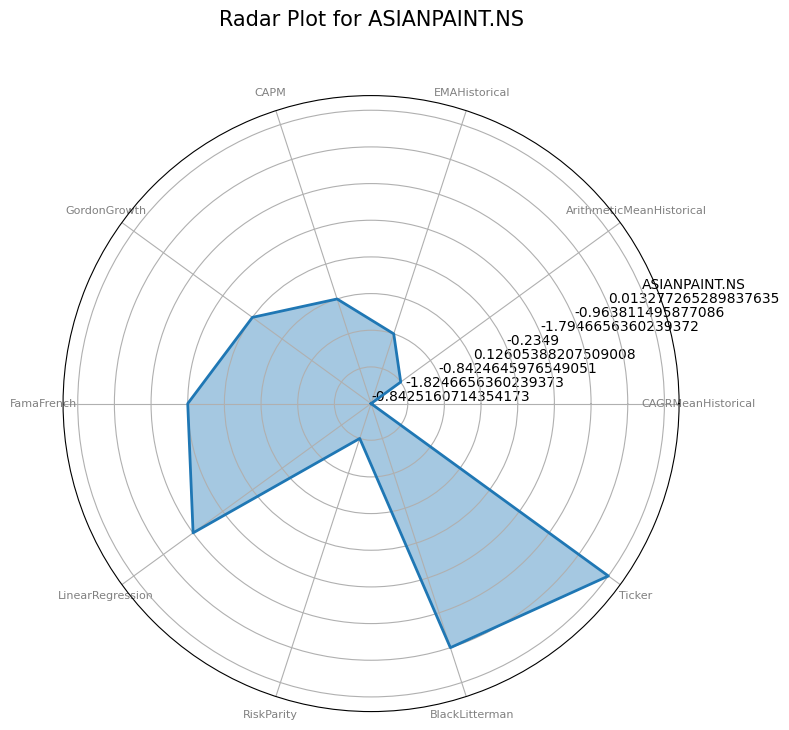

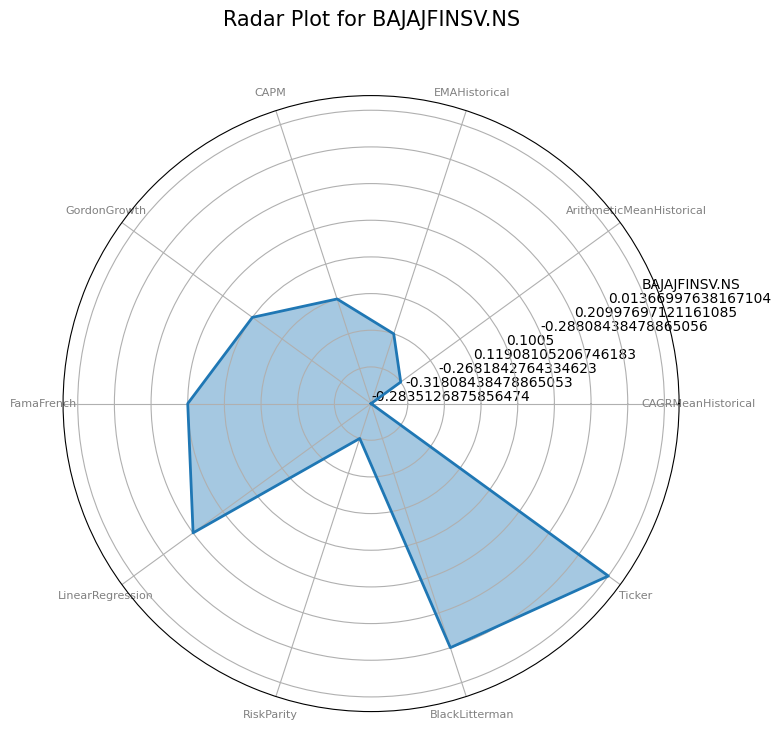

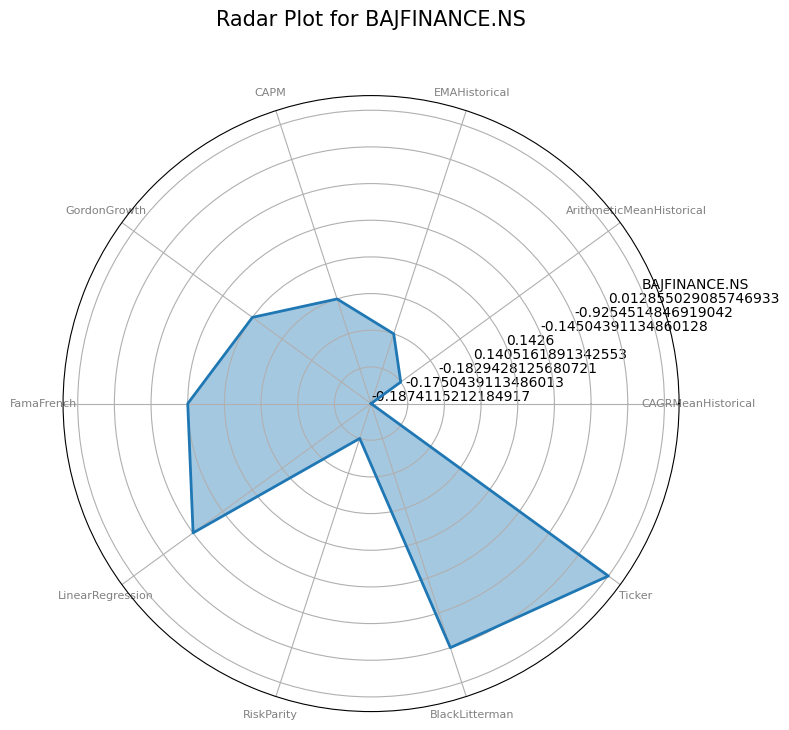

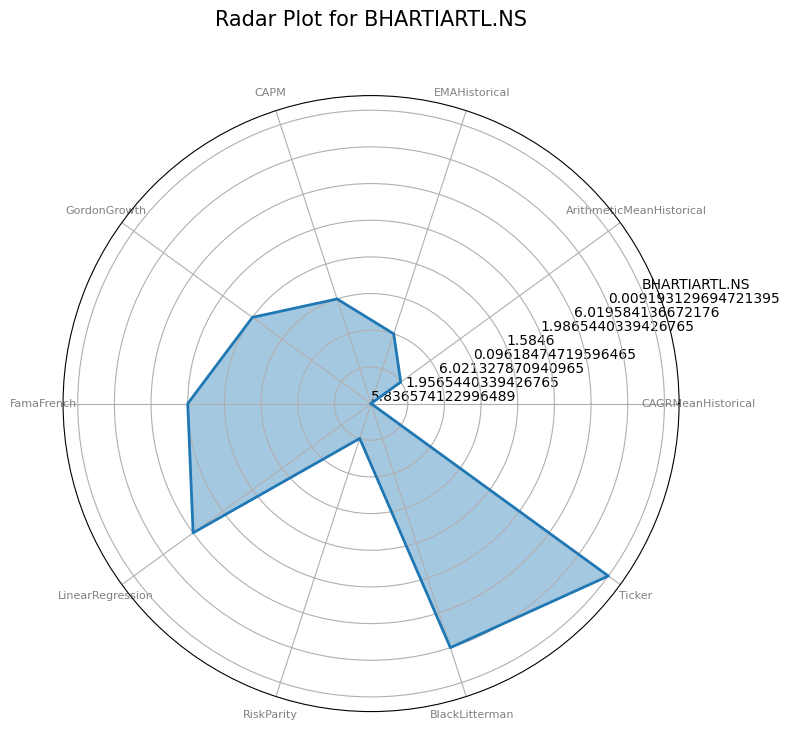

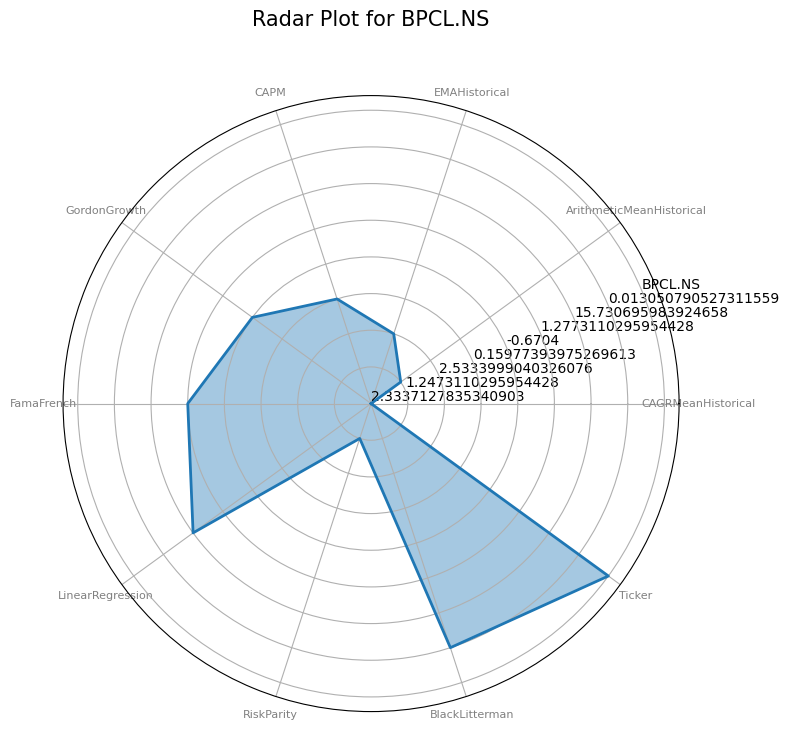

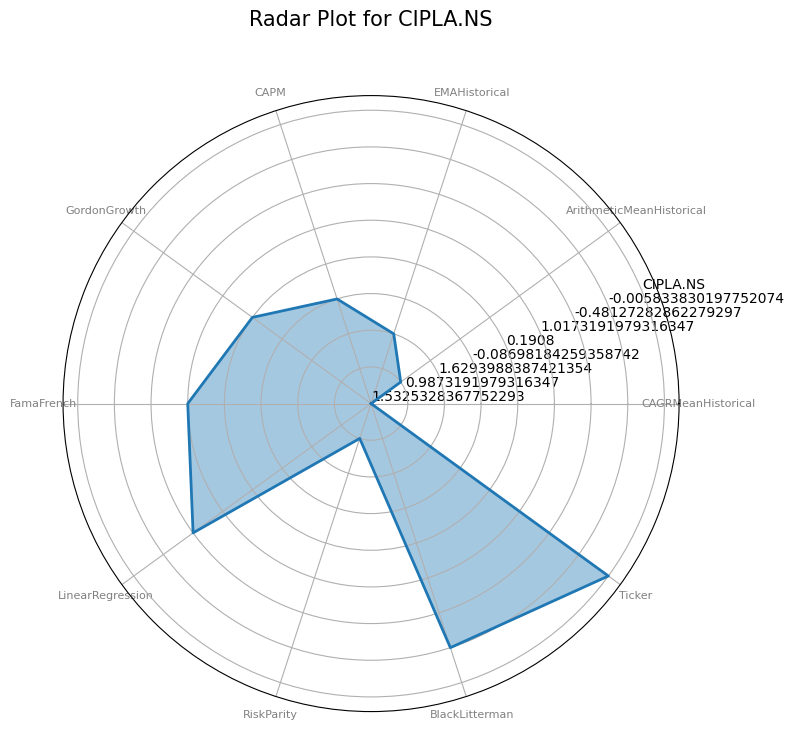

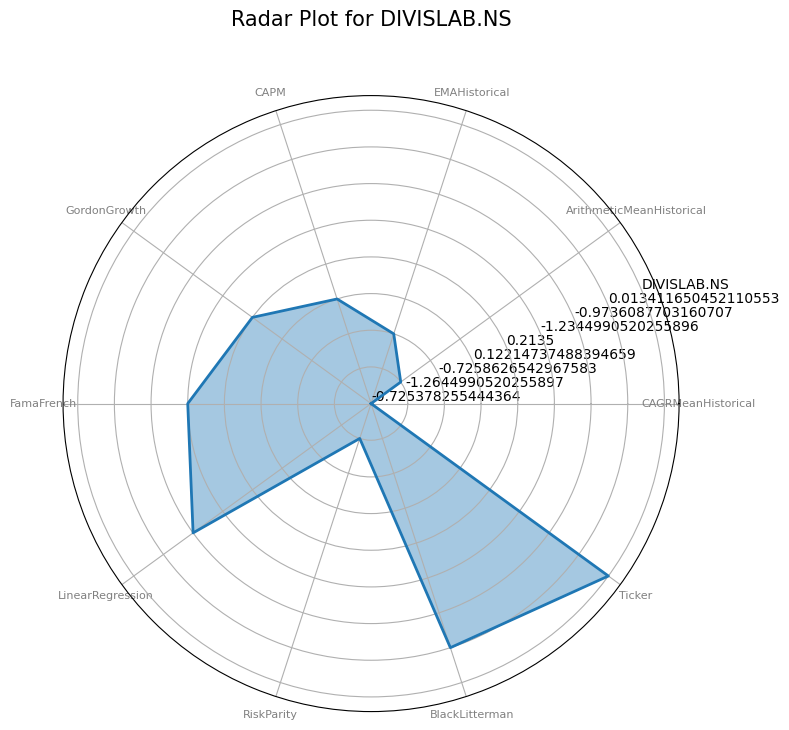

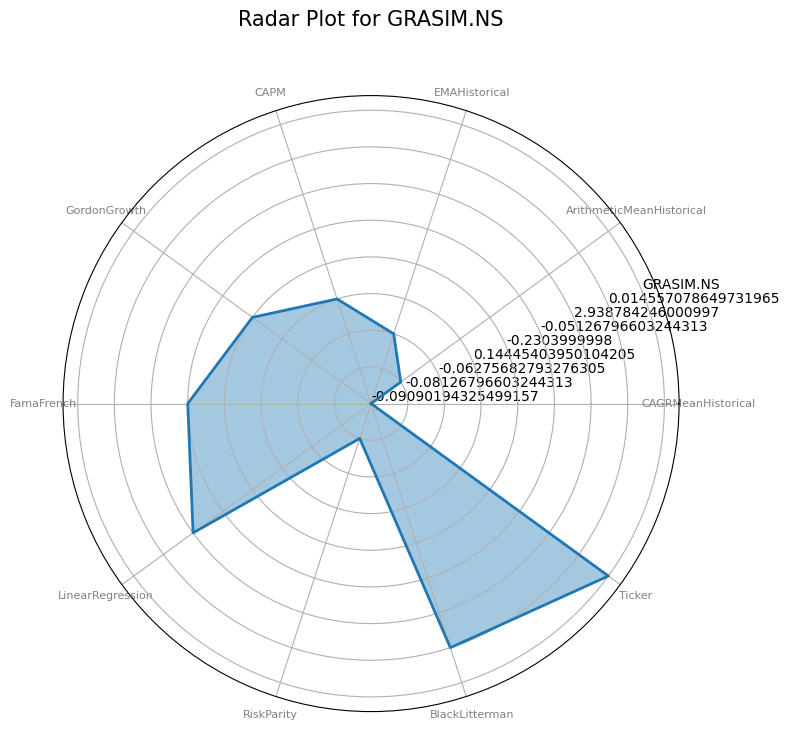

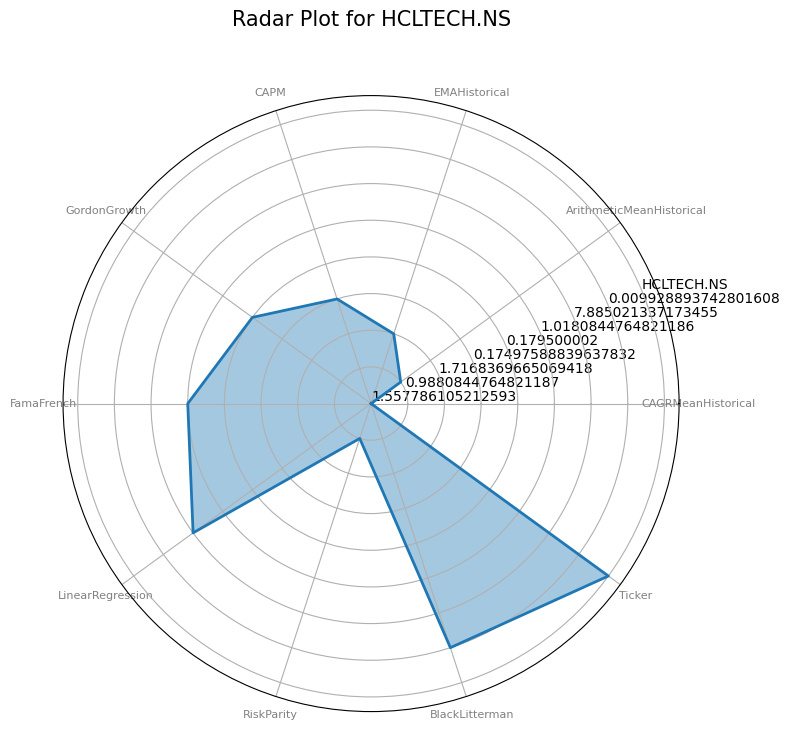

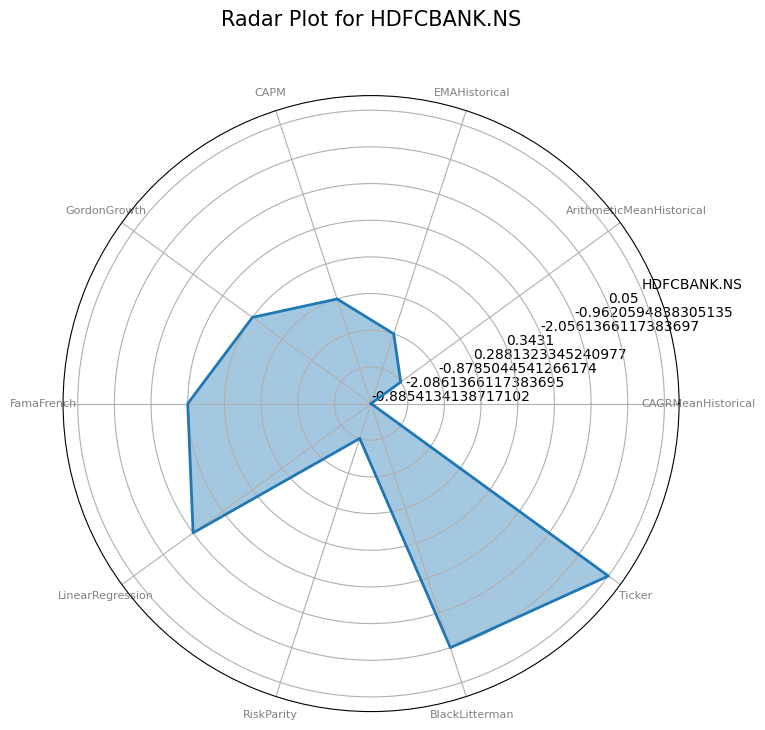

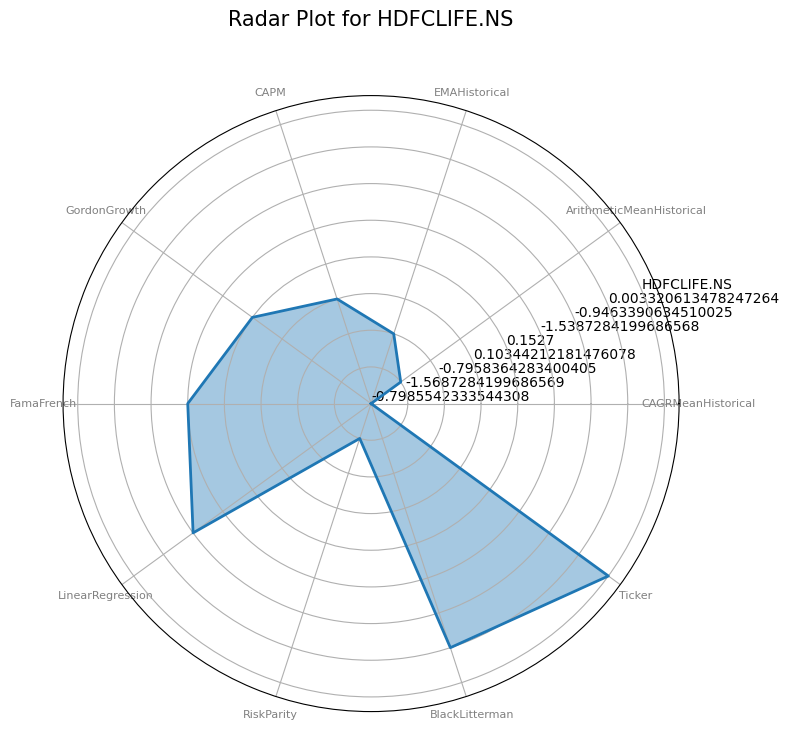

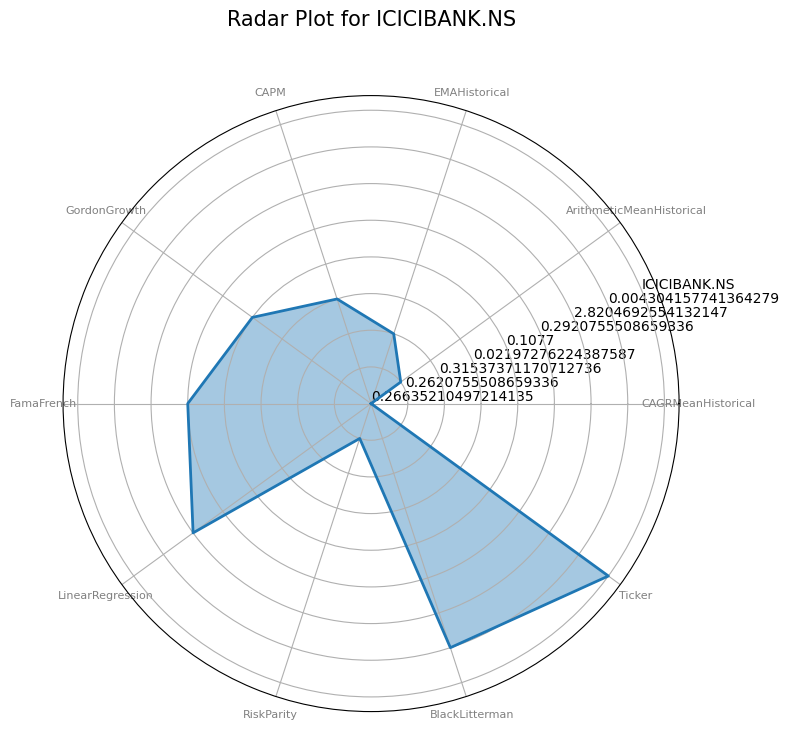

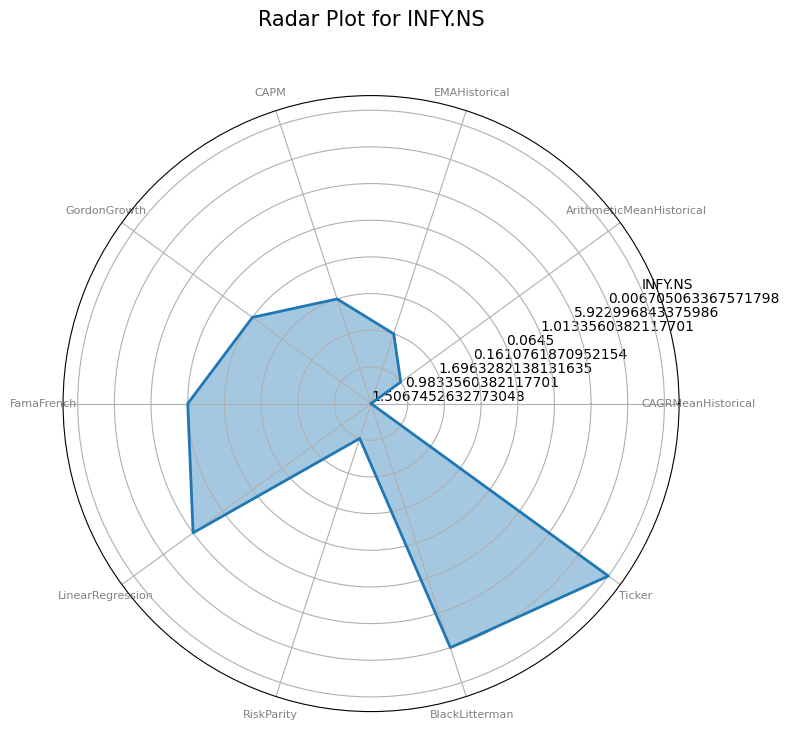

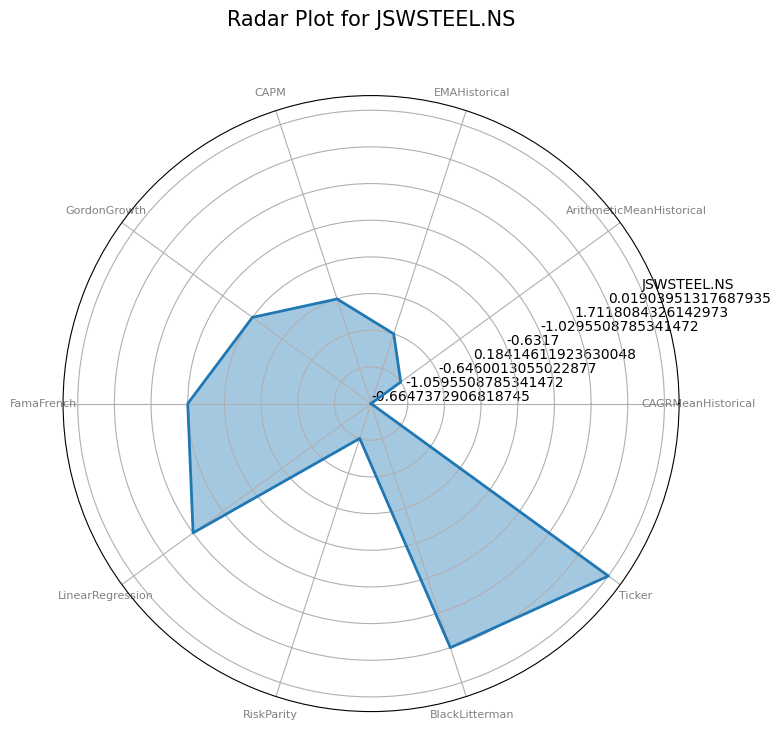

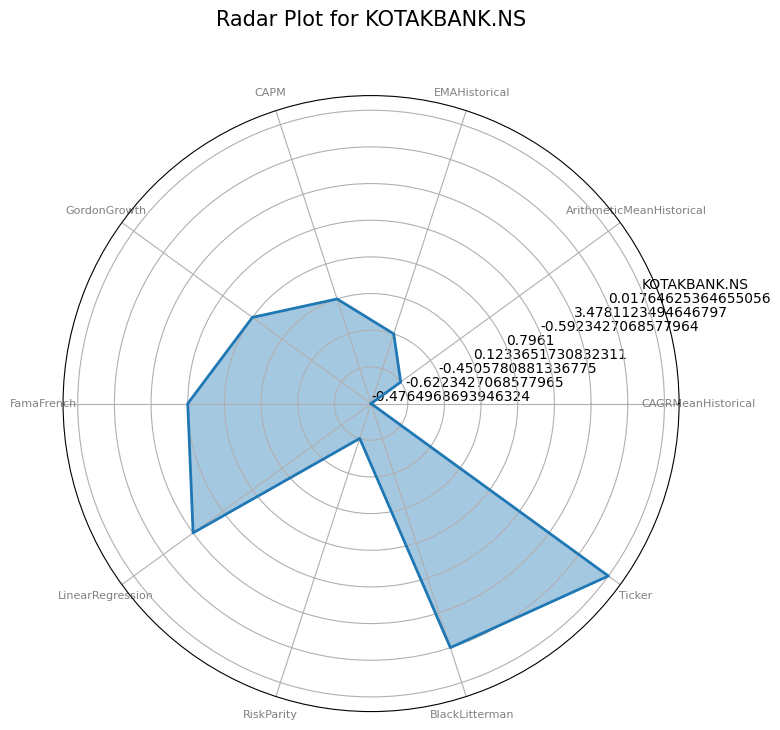

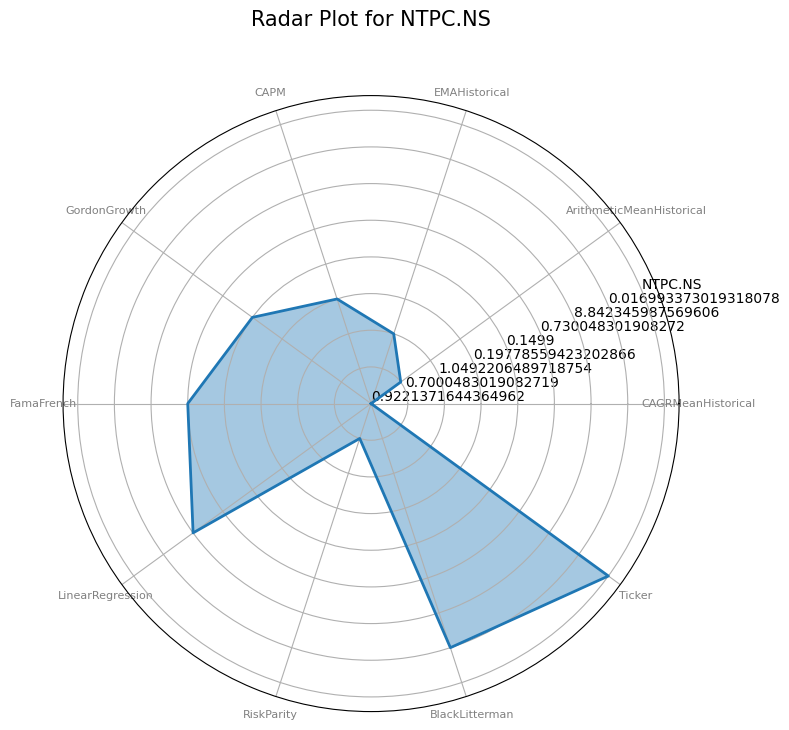

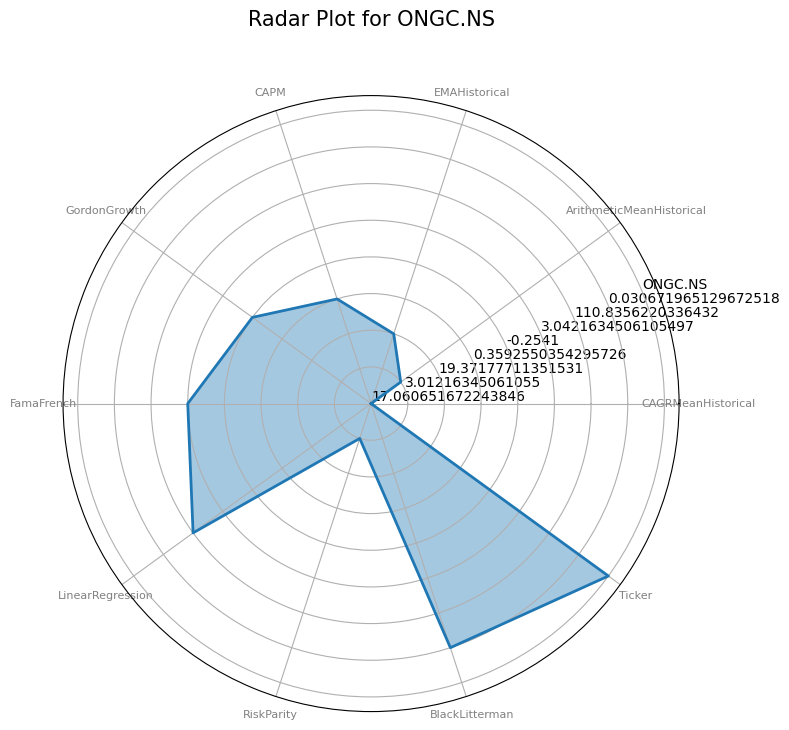

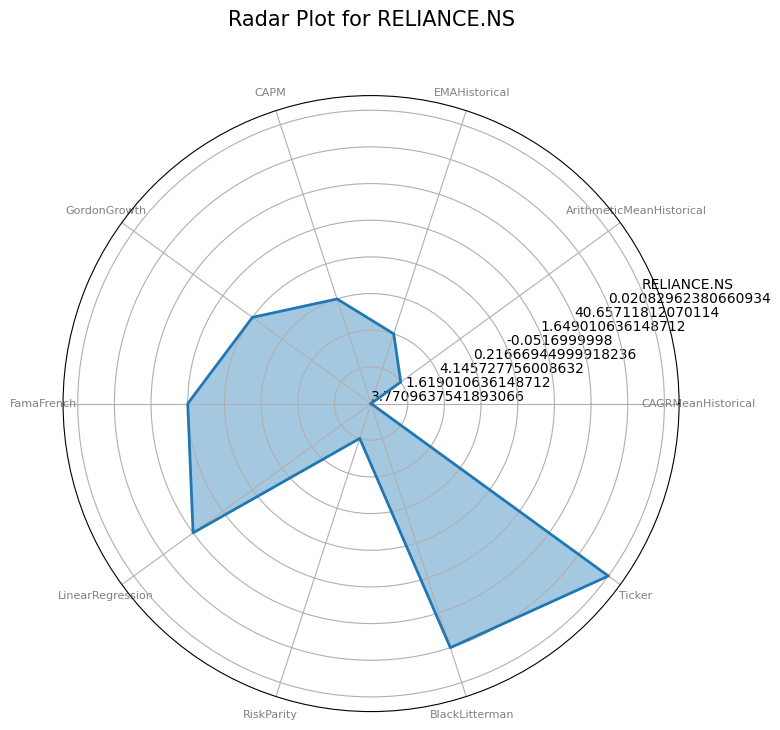

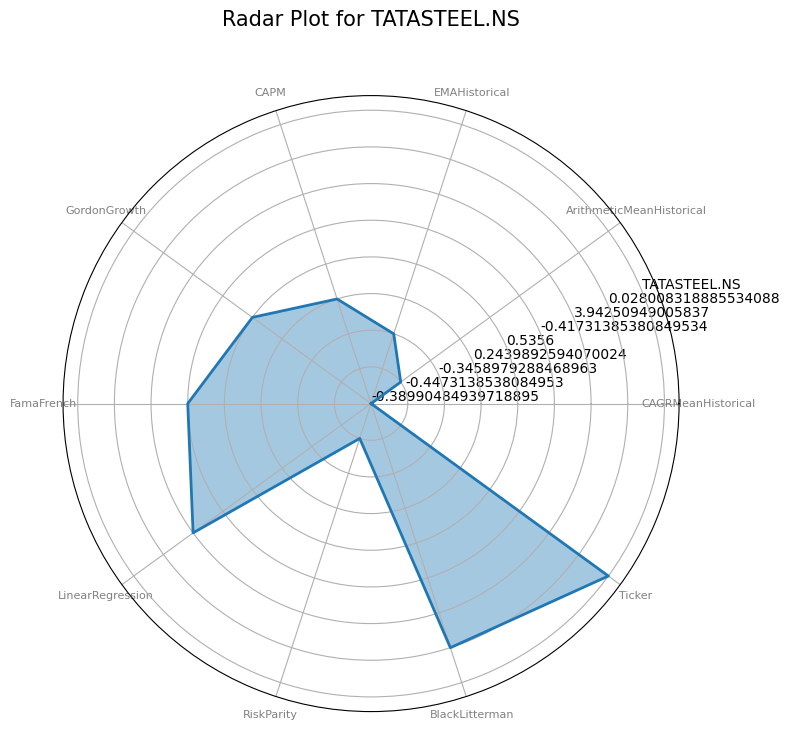

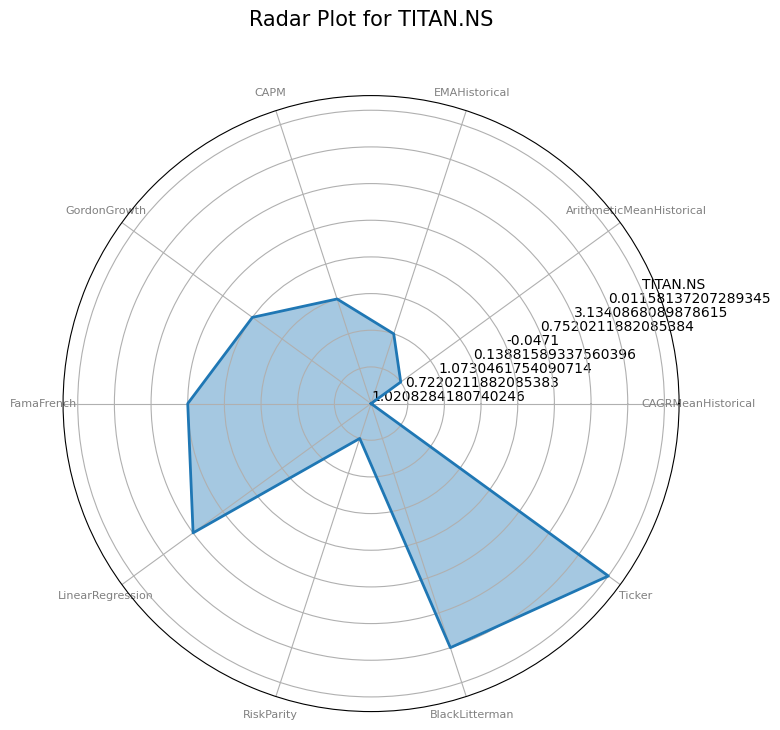

In [ ]:
# import numpy as np

# # Radar Plot function
# def radar_plot(data, ticker):
#     categories = list(data.columns)
#     values = data.loc[ticker].values.flatten().tolist()
#     values += values[:1]  # Repeat the first value to close the circular graph

#     # Radar plot setup
#     N = len(categories)
#     angles = [n / float(N) * 2 * np.pi for n in range(N)]
#     angles += angles[:1]

#     plt.figure(figsize=(8, 8))
#     ax = plt.subplot(111, polar=True)
#     plt.xticks(angles[:-1], categories, color='grey', size=8)
#     ax.plot(angles, values, linewidth=2, linestyle='solid')
#     ax.fill(angles, values, alpha=0.4)
#     plt.title(f'Radar Plot for {ticker}', size=15, y=1.1)
#     plt.show()

# # Example usage
# radar_plot(df, 'ONGC.NS')  # Replace 'ONGC.NS' with the desired ticker


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

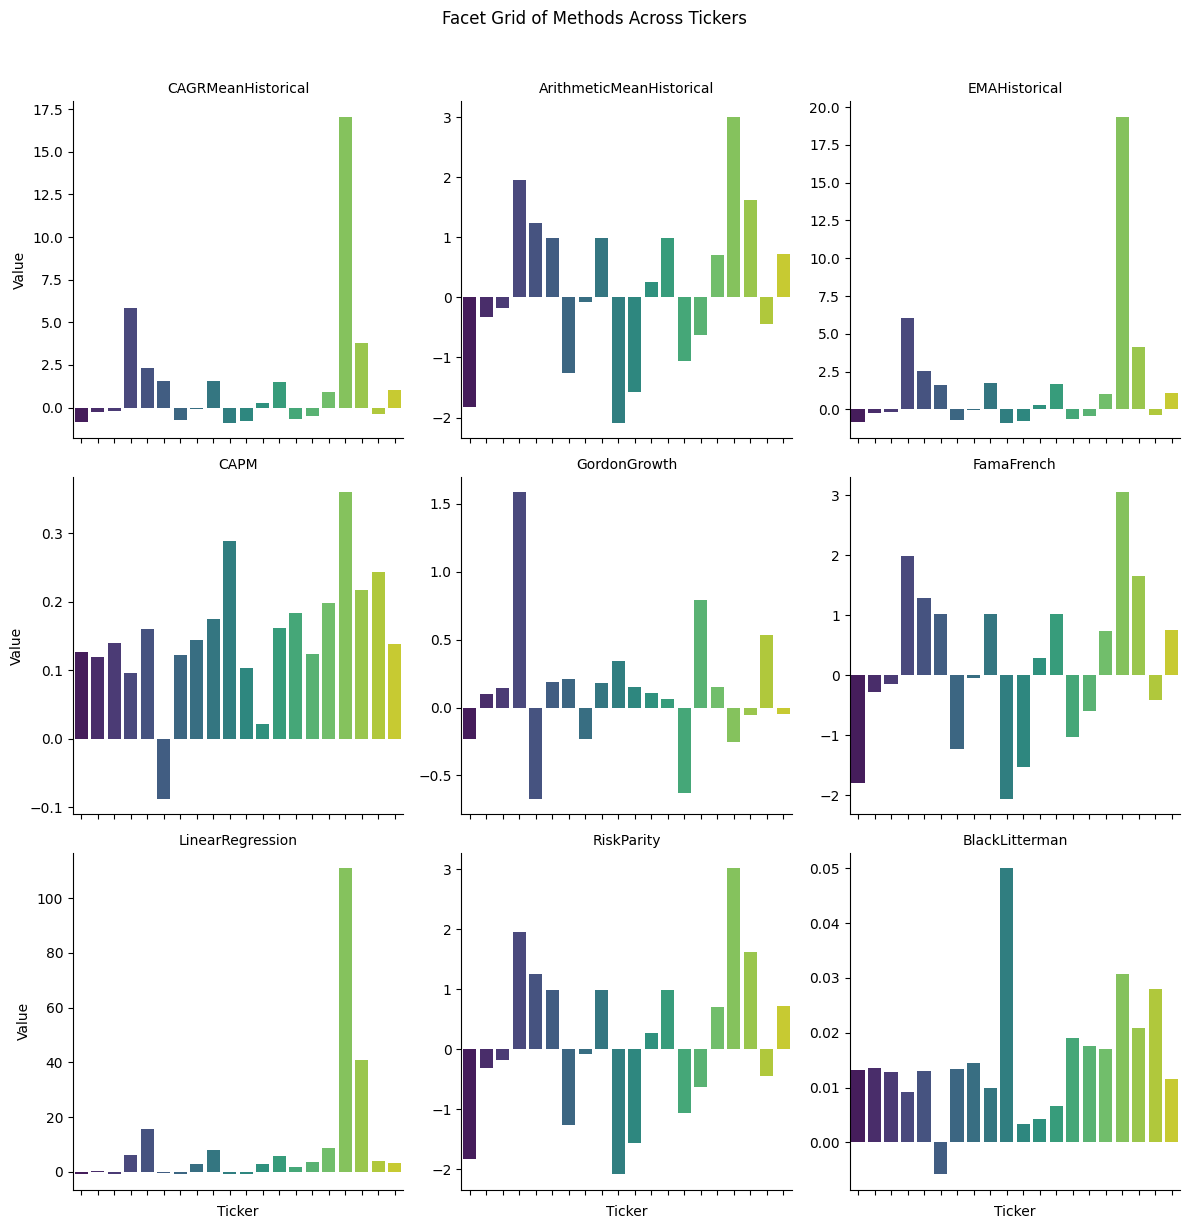

In [ ]:
# Facet Grid plot to compare values across different subsets of methods
df_melted = df.reset_index().melt(id_vars=['Ticker'], var_name='Method', value_name='Value')
g = sns.FacetGrid(df_melted, col="Method", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='Ticker', y='Value', palette='viridis')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle('Facet Grid of Methods Across Tickers', y=1.02)
plt.tight_layout()
plt.show()


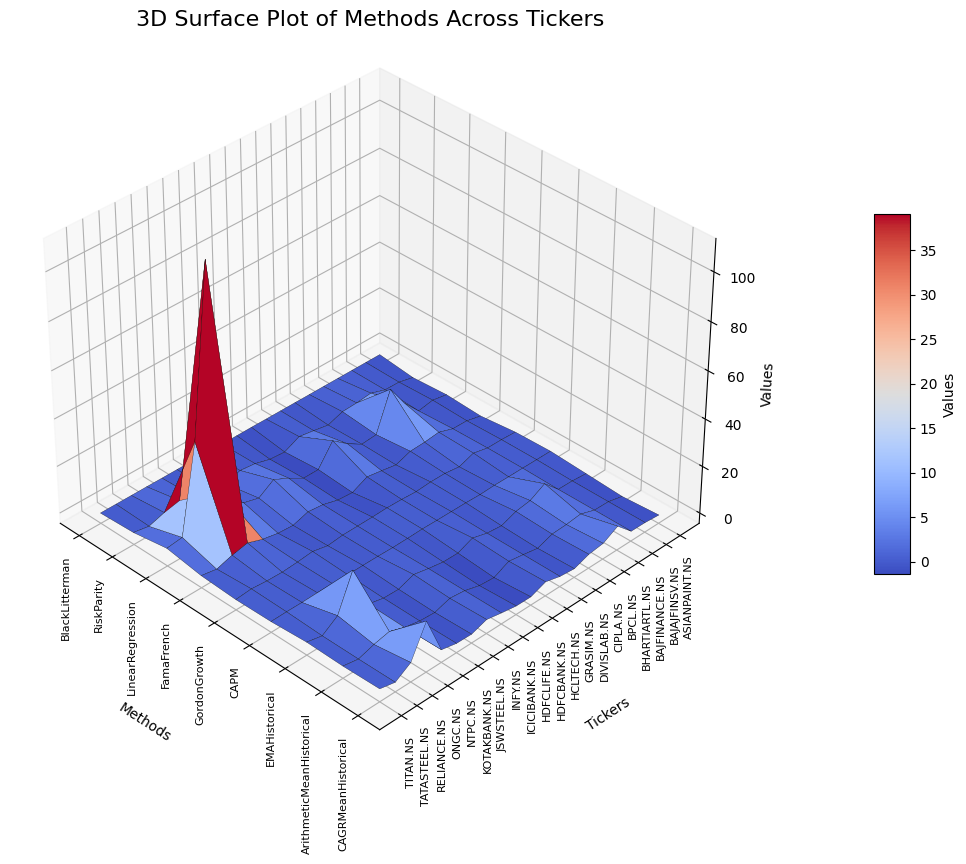

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Surface Plot - visualizing methods, tickers, and values in 3D space
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(df.columns))
y = np.arange(len(df.index))
x, y = np.meshgrid(x, y)
z = df.values

surf = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='k')
ax.set_xticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')
ax.set_yticks(np.arange(len(df.index)))
ax.set_yticklabels(df.index)
ax.set_title('3D Surface Plot of Methods Across Tickers')
ax.set_xlabel('Methods')
ax.set_ylabel('Tickers')
ax.set_zlabel('Values')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()
